GRIP: The Sparks Foundation

Task 3 :- Prediction using Decision tree algorithm (Level - Medium)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# Create features matrix
x = df.loc[:, features].values

In [5]:
y=df.Species
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)
clf = DecisionTreeClassifier(max_depth = 2,random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [6]:
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [7]:
from sklearn import metrics
import seaborn as sns

In [8]:
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [9]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



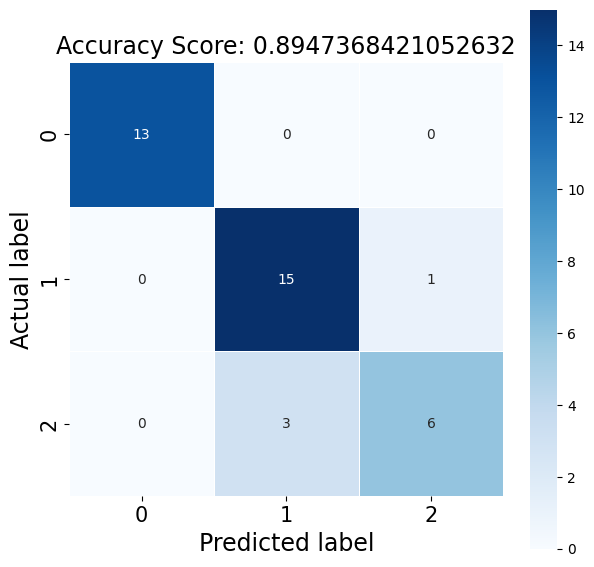

In [10]:
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [11]:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    accuracy.append(score)

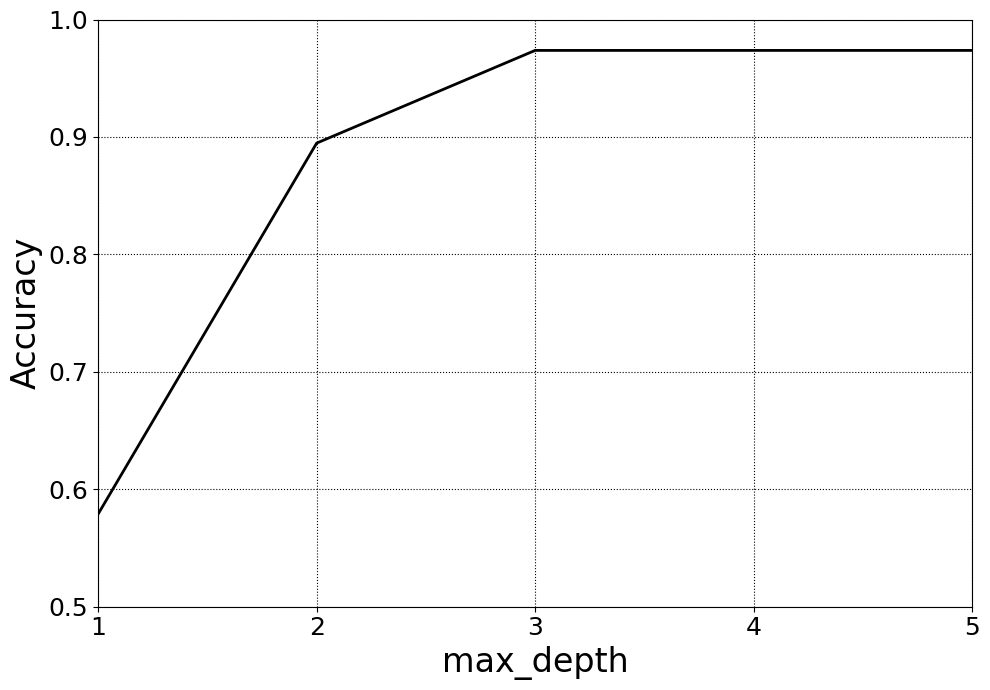

In [12]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')


ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()

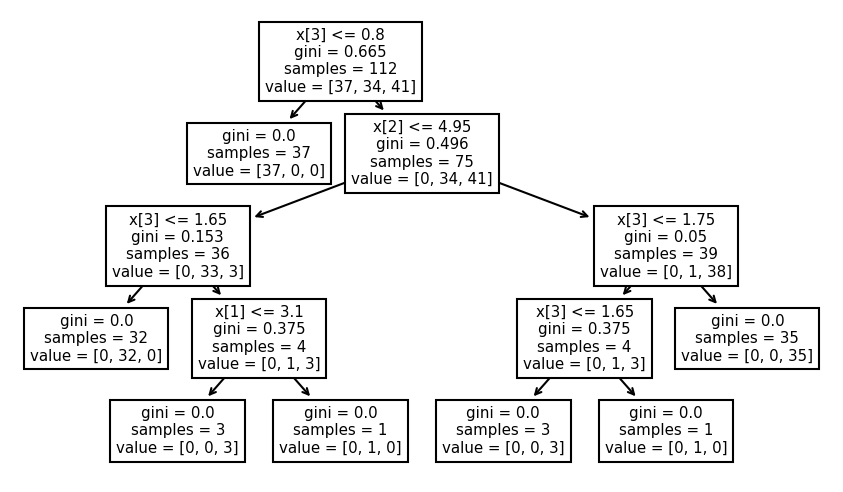

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)

tree.plot_tree(clf);

In [14]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

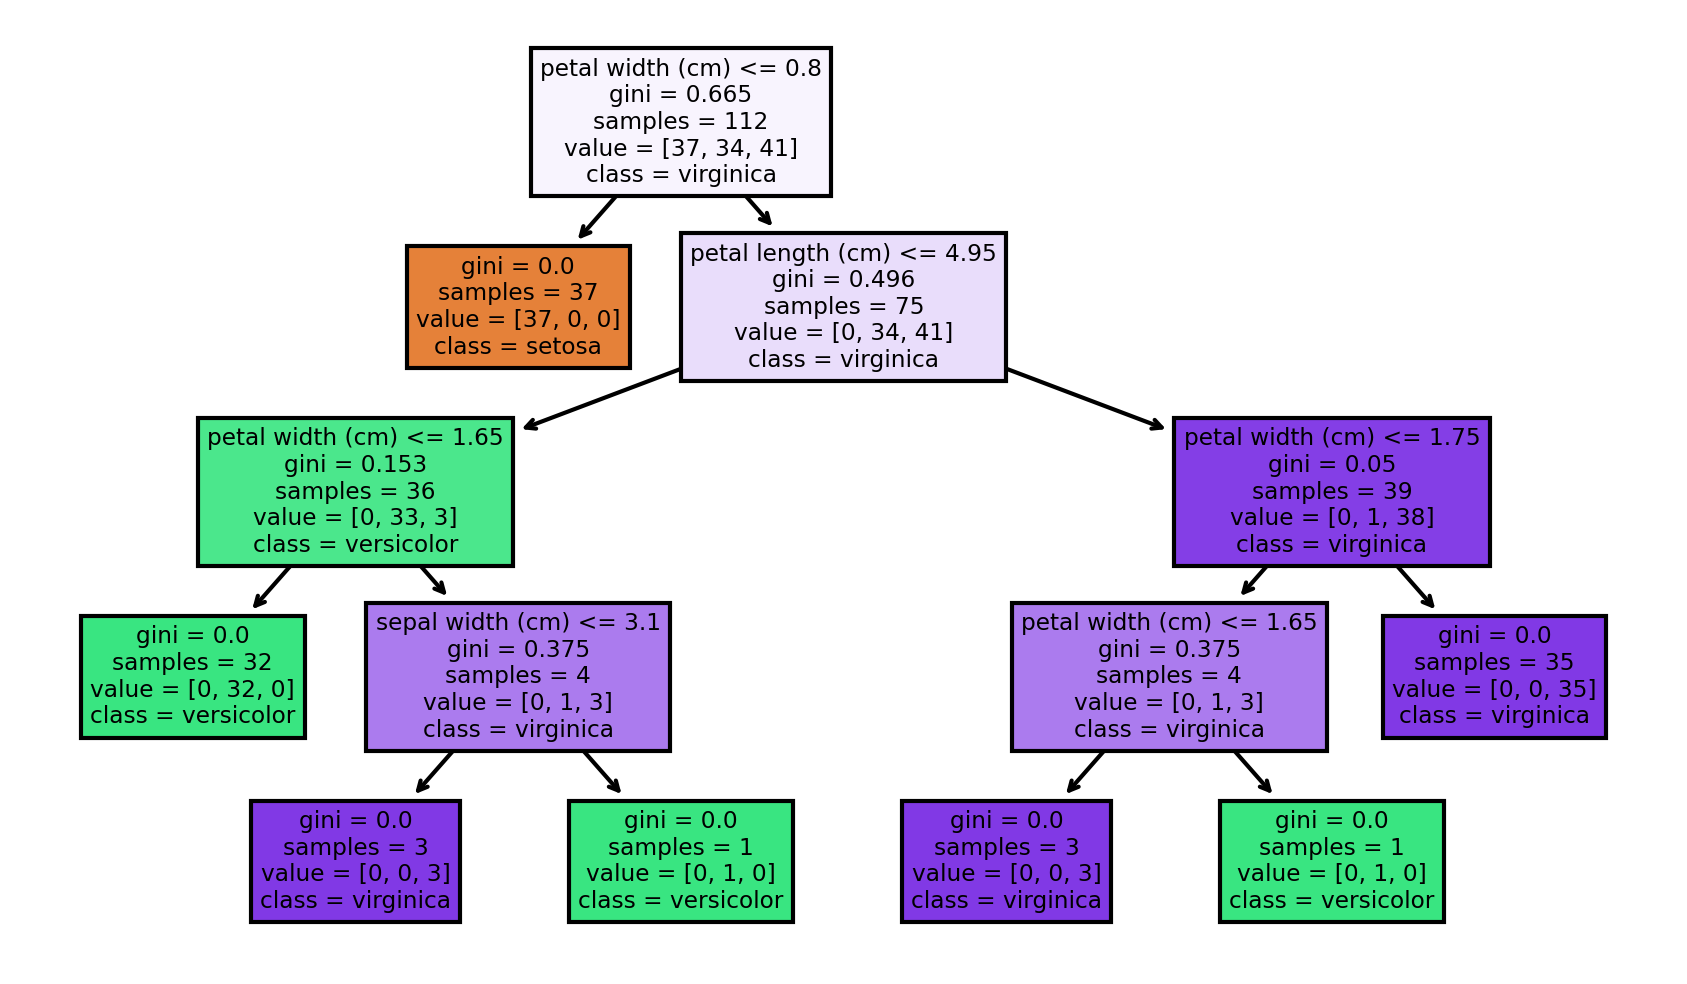

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);